In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/projeto-ia-datasets/classificacao_cachorro_gato.xlsx', sheet_name=1, nrows=10)
df

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore,eh_um_gato
0,1,1,0,1,1,1,1
1,1,1,0,1,0,1,1
2,0,1,0,0,0,1,1
3,1,1,1,0,1,0,0
4,1,0,1,0,1,0,0
5,1,0,1,0,1,0,0
6,1,0,0,1,0,1,1
7,1,1,0,1,1,0,0
8,1,1,0,1,1,0,0
9,1,0,0,0,1,0,1


In [ ]:
# features
X = df.drop('eh_um_gato', axis='columns')
X

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore
0,1,1,0,1,1,1
1,1,1,0,1,0,1
2,0,1,0,0,0,1
3,1,1,1,0,1,0
4,1,0,1,0,1,0
5,1,0,1,0,1,0
6,1,0,0,1,0,1
7,1,1,0,1,1,0
8,1,1,0,1,1,0
9,1,0,0,0,1,0


In [ ]:
# target
y = df['eh_um_gato']
y

0    1
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    0
9    1
Name: eh_um_gato, dtype: int64

# Treinando o Modelo

In [ ]:
# importando o módulo tree para árvores de decisão
from sklearn import tree

# instanciando um árvore de decisão
dt = tree.DecisionTreeClassifier()

In [ ]:
# treinando o modelo
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# prevendo o label: acima de 0.5 é 1 (gato) e abaixo ou igual é 0 (não é gato)
df['resposta'] = dt.predict(X)

In [ ]:
df

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore,eh_um_gato,resposta
0,1,1,0,1,1,1,1,1
1,1,1,0,1,0,1,1,1
2,0,1,0,0,0,1,1,1
3,1,1,1,0,1,0,0,0
4,1,0,1,0,1,0,0,0
5,1,0,1,0,1,0,0,0
6,1,0,0,1,0,1,1,1
7,1,1,0,1,1,0,0,0
8,1,1,0,1,1,0,0,0
9,1,0,0,0,1,0,1,1


In [ ]:
# prevendo a probabilidade de ser gato
df['probabilidade'] = dt.predict_proba(X)[:,1]

In [ ]:
df

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore,eh_um_gato,resposta,probabilidade
0,1,1,0,1,1,1,1,1,1.0
1,1,1,0,1,0,1,1,1,1.0
2,0,1,0,0,0,1,1,1,1.0
3,1,1,1,0,1,0,0,0,0.0
4,1,0,1,0,1,0,0,0,0.0
5,1,0,1,0,1,0,0,0,0.0
6,1,0,0,1,0,1,1,1,1.0
7,1,1,0,1,1,0,0,0,0.0
8,1,1,0,1,1,0,0,0,0.0
9,1,0,0,0,1,0,1,1,1.0


# Plotando a Árvore

In [ ]:
tree.export_graphviz(dt, feature_names=X.columns, class_names=['cachorro', 'gato'], 
                     filled=True, rounded=True, out_file='tree.dot')

In [ ]:
# conda install python-graphviz

!dot -Tpng tree.dot -o tree.png

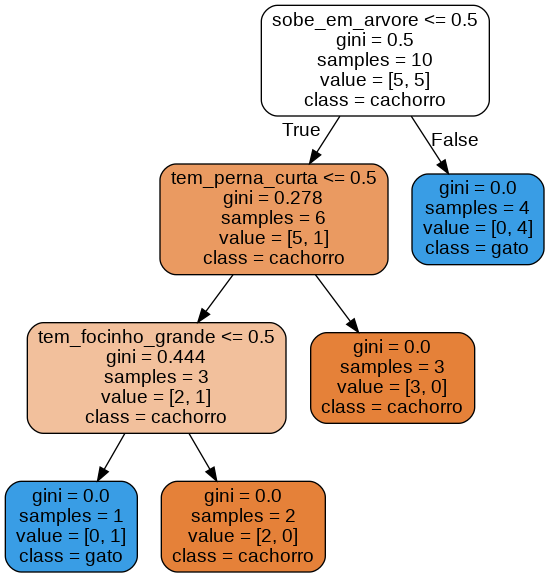

In [ ]:
from IPython.display import Image

Image('tree.png')

##### Em Formato de Texto

In [ ]:
print(tree.export_text(dt, feature_names=X.columns.to_list()))

|--- sobe_em_arvore <= 0.50
|   |--- tem_perna_curta <= 0.50
|   |   |--- tem_focinho_grande <= 0.50
|   |   |   |--- class: 1
|   |   |--- tem_focinho_grande >  0.50
|   |   |   |--- class: 0
|   |--- tem_perna_curta >  0.50
|   |   |--- class: 0
|--- sobe_em_arvore >  0.50
|   |--- class: 1



# Prevendo um Exemplo Novo

In [ ]:
df_new = pd.read_excel('/content/drive/MyDrive/projeto-ia-datasets/classificacao_cachorro_gato.xlsx', sheet_name=2)
df_new = df_new.drop('Exemplo', axis=1)
df_new

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore
0,0,0,0,1,0,1


In [ ]:
df_new['resposta'] = dt.predict(df_new)

In [ ]:
df_new

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore,resposta
0,0,0,0,1,0,1,1
